In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema

In [97]:
file_paths = ['data/Bodø_2021.csv', 'data/Hammerfest_2021.csv', 'data/Måløy_2021.csv', 'data/Tregde_2021.csv']
station_names = ['Bodø', 'Hammerfest', 'Måløy', 'Tregde']
data = []
for f in file_paths:
    df = pd.pandas.read_csv(f)
    data.append(df)
   


In [98]:
n = 40 # number of datapoints take into account when calculating local min and max 
wh_list = []
for df in data:
    df['min'] = df.iloc[argrelextrema(df.level.values, np.less_equal, order=n)[0]]['level']
    df['max'] = df.iloc[argrelextrema(df.level.values, np.greater_equal, order=n)[0]]['level']
    df['extremes'] = df['max'].fillna(0) + df['min'].fillna(0)
    extremes = df.extremes
    extremes = extremes[extremes!=0]
    extremes = extremes.reset_index(drop=True)

    #since there are some dupliated values (like water level did not changed at all in 10 mins, so they create "fake" local maximum, we remove duplicates)
    prev = extremes[0]
    duplicates = []
    for i in range(1, extremes.shape[0]):
        if extremes[i] == prev:
         duplicates.append(i)
    prev = extremes[i]
    extremes = extremes.drop(duplicates)
    wave_heights = extremes.diff().dropna().abs()
    wave_heights = wave_heights[wave_heights!=0]
    wh_list.append(wave_heights)

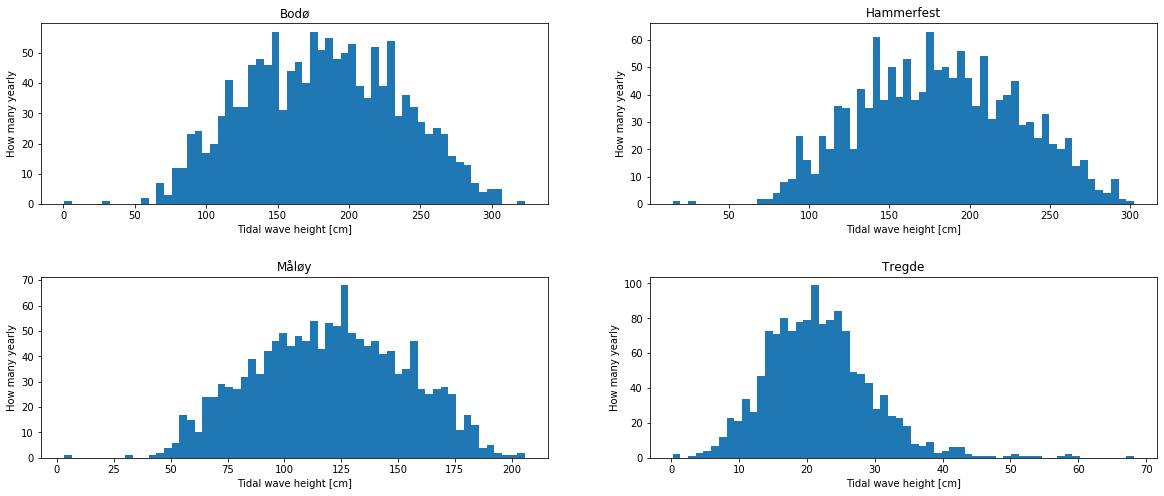

In [103]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize = [20, 8])
plt.subplots_adjust(hspace=0.4)
for i in range (0,4):
    row =  int(i/2)
    col =  i%2
    ax[row,col].hist(wh_list[i], bins = 60)
    ax[row,col].set_title(station_names[i])
    ax[row,col].set_xlabel("Tidal wave height [cm]")
    ax[row,col].set_ylabel("How many yearly")
plt.savefig('tidal_wave_heights_distribution.png')


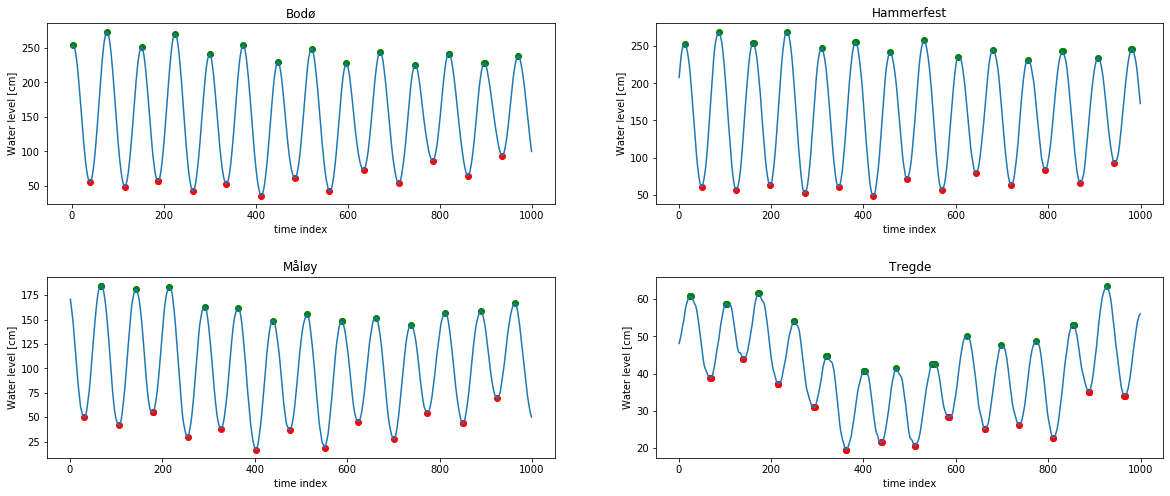

In [100]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize = [20, 8])
datapoints_no = 1000
plt.subplots_adjust(hspace=0.4)
for i in range (0,4):
    row =  int(i/2)
    col =  i%2
    df = data[i]
    ax[row,col].scatter(df.index[1:datapoints_no], df['min'][1:datapoints_no].to_numpy(), c='r')
    ax[row,col].scatter(df.index[1:datapoints_no], df['max'][1:datapoints_no].to_numpy(), c='g')
    ax[row,col].plot(df.index[1:datapoints_no].to_numpy(), df['level'][1:datapoints_no].to_numpy())
    ax[row,col].set_title(station_names[i])
    ax[row,col].set_xlabel("time index")
    ax[row,col].set_ylabel("Water level [cm]")

In [114]:
for i in range(0,4):
    print("Mean yearly tidal wave height for: {}  {:.2f} [cm]".format(station_names[i], wh_list[i].mean()))


Mean yearly tidal wave height for: Bodø  181.32 [cm]
Mean yearly tidal wave height for: Hammerfest  181.54 [cm]
Mean yearly tidal wave height for: Måløy  119.96 [cm]
Mean yearly tidal wave height for: Tregde  21.75 [cm]


In [109]:
print("{:.2f}".format(wh_list[2].mean()))

119.96
